We will build a Linear regression model for Medical cost dataset. The dataset consists of age, sex, BMI(body mass index), children, smoker and region feature, which are independent and charge as a dependent feature. We will predict individual medical costs billed by health insurance.

# Definition & Working principle
Let's build model using **Linear regression**.

Linear regression is a **supervised learining** algorithm used when target / dependent variable  **continues** real number. It establishes relationship between dependent variable $y$ and one or more independent variable $x$ using best fit line.   It work on the principle of ordinary least square $(OLS)$ / Mean square errror $(MSE)$. In statistics ols is method to estimated unkown parameter of linear regression function, it's goal is to minimize sum of square difference between observed dependent variable in the given data set and those predicted by linear regression fuction. 

## Hypothesis representation

We will use $\mathbf{x_i}$ to denote the independent variable and $\mathbf{y_i}$ to denote dependent variable. A pair of $\mathbf{(x_i,y_i)}$ is called training example. The subscripe $\mathbf{i}$ in the notation is simply index into the training set. We have $\mathbf{m}$ training example then $\mathbf{i = 1,2,3,...m}$.

The goal of supervised learning is to learn a *hypothesis function $\mathbf{h}$*, for a given training set that can used to estimate $\mathbf{y}$ based on $\mathbf{x}$. So hypothesis fuction represented as 

$$\mathbf{ h_\theta(x_{i}) = \theta_0 + \theta_1x_i }$$   
$\mathbf{\theta_0,\theta_1}$ are parameter of hypothesis.This is equation for **Simple / Univariate Linear regression**. 

For **Multiple Linear regression** more than one independent variable exit then we will use $\mathbf{x_{ij}}$ to denote indepedent variable and $\mathbf{y_{i}}$ to denote dependent variable. We have $\mathbf{n}$ independent variable then $\mathbf{j=1,2,3 ..... n}$. The hypothesis function represented as

$$\mathbf{h_\theta(x_{i}) = \theta_0 + \theta_1x_{i1} + \theta_2 x_{i2} + ..... \theta_j x_{ij} ...... \theta_n  x_{mn} }$$
$\mathbf{\theta_0,\theta_1,....\theta_j....\theta_n }$ are parameter of hypothesis,
$\mathbf{m}$ Number of training exaples,
$\mathbf{n}$ Number of independent variable,
$\mathbf{x_{ij}}$ is $\mathbf{i^{th}}$ training exaple of $\mathbf{j^{th}}$ feature.


## Import Library and Dataset
Now we will import couple of python library required for our analysis and import dataset 

In [1]:
# Import library
import pandas  as pd #Data manipulation
import numpy as np #Data manipulation
import matplotlib.pyplot as plt # Visualization
import seaborn as sns #Visualization
plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] =14
plt.rcParams['font.weight']= 'bold'
plt.style.use('seaborn-whitegrid')

In [2]:
# Import dataset
#path ='dataset/'
df = pd.read_csv('Parker.csv')
print('\nNumber of rows and columns in the data set: ',df.shape)
print('')

#Lets look into top few rows and columns in the dataset
df.head()


Number of rows and columns in the data set:  (7, 3)



,Income_Range,Before_FBS,After_FBS
0,1-1000GHC,38,18
1,1000-2000GHC,41,14
2,2000-3000GHC,25,31
3,3000-4000GHC,26,29
4,4000-5000GHC,9,18


Now we have import dataset. When we look at the shape of dataset it has return as (1338,7).So there are $\mathbf{m=1338}$ training exaple and $\mathbf{n=7}$ independent variable. The target variable here is charges and remaining six variables such as age, sex, bmi, children, smoker, region are independent variable. There are multiple independent variable, so we need to fit Multiple linear regression. Then the hypothesis function looks like

$$\mathbf{ h_\theta(x_{i}) = \theta_0+\theta_1 age + \theta_2 sex + \theta_3 bmi + \theta_4 children + \theta_5 smoker + \theta_6 region }$$

This multiple linear regression equation for given dataset.  
If $\mathbf{i=1}$ then 
$$\mathbf{h_\theta(x_{1}) = \theta_0+\theta_1 19 + \theta_2 female + \theta_3 27.900 + \theta_4 1 + \theta_5 yes + \theta_6 southwest}$$ 
$$\mathbf{y_1 = 16884.92400}$$
If $\mathbf{i=3}$ then $$\mathbf{h_\theta(x_{3}) = \theta_0+\theta_1 28 + \theta_2 male + \theta_3 33.000 + \theta_4 3 + \theta_5 no + \theta_6 northwest}$$ 
$$\mathbf{y_3 = 4449.46200}$$
*Note*: In python index starts from 0.
$$\mathbf{x_1 = \left(\begin{matrix} x_{11} & x_{12} & x_{13} & x_{14} & x_{15} & x_{16}\end{matrix}\right) = \left(\begin{matrix} 19 & female & 27.900 & 1 & no & northwest\end{matrix}\right) }$$

## Matrix Formulation

In general we can write above vector as $$ \mathbf{ x_{ij}} = \left( \begin{smallmatrix} \mathbf{x_{i1}} & \mathbf{x_{i2}} &.&.&.& \mathbf{x_{in}} \end{smallmatrix} \right)$$

Now we combine all aviable individual vector into single input matrix of size $(m,n)$ and denoted it by $\mathbf{X}$ input matrix, which consist of all training exaples,
$$\mathbf{X} = \left( \begin{smallmatrix} x_{11} & x_{12} &.&.&.&.& x_{1n}\\
                                x_{21} & x_{22} &.&.&.&.& x_{2n}\\
                                x_{31} & x_{32} &.&.&.&.& x_{3n}\\
                                .&.&.&. &.&.&.& \\
                                .&.&.&. &.&.&.& \\
                                x_{m1} & x_{m2} &.&.&.&.&. x_{mn}\\
                                \end{smallmatrix} \right)_{(m,n)}$$

We represent parameter of function and dependent variable in vactor form as  
$$\theta = \left (\begin{matrix} \theta_0 \\ \theta_1 \\ .\\.\\ \theta_j\\.\\.\\ \theta_n \end {matrix}\right)_{(n+1,1)} 
\mathbf{ y } = \left (\begin{matrix} y_1\\ y_2\\. \\. \\ y_i \\. \\. \\ y_m \end{matrix} \right)_{(m,1)}$$

So we represent hypothesis function in vectorize form $$\mathbf{ h_\theta{(x)} = X\theta}$$.



UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U32'), dtype('<U32')) -> dtype('<U32')

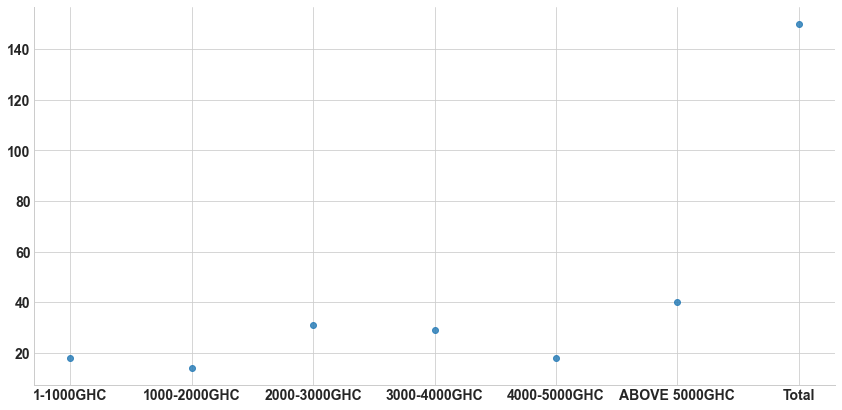

In [3]:
""" for our visualization purpose will fit line using seaborn library only for bmi as independent variable 
and charges as dependent variable"""

sns.lmplot(x='Income_Range',y='After_FBS',data=df,aspect=2,height=6)
plt.xlabel('Boby Mass Index$(kg/m^2)$: as Independent variable')
plt.ylabel('Insurance Charges: as Dependent variable')
plt.title('Charge Vs BMI');

In above plot we fit regression line into the variables.

## Cost function

  A cost function measures how much error in the model is in terms of ability to estimate the relationship between $x$ and $y$. 
  We can measure the accuracy of our hypothesis function by using a cost function. This takes an average difference of observed dependent variable in the given the dataset and those predicted by the hypothesis function.
  
$$\mathbf{ J(\theta) = \frac{1}{m} \sum_{i=1}^{m}(\hat{y}_i - y_i)^2}$$
$$\mathbf{J(\theta) =  \frac{1}{m} \sum_{i=1}^{m}(h_\theta(x_i) - y_i)^2}$$
To implement the linear regression, take training example add an extra column that is $x_0$ feature, where $\mathbf{x_0=1}$. $\mathbf{x_{o}} = \left( \begin{smallmatrix} x_{i0} & x_{i1} & x_{i2} &.&.&.& x_{mi} \end{smallmatrix} \right)$,where $\mathbf{x_{i0} =0}$ and input matrix will become as

$$\mathbf{X} = \left( \begin{smallmatrix} x_{10} & x_{11} & x_{12} &.&.&.&.& x_{1n}\\
                                x_{20} & x_{21} & x_{22} &.&.&.&.& x_{2n}\\
                                x_{30} & x_{31} & x_{32} &.&.&.&.& x_{3n}\\
                                 .&.&.&.&. &.&.&.& \\
                                 .&.&.&.&. &.&.&.& \\
                                x_{m0} & x_{m1} & x_{m2} &.&.&.&.&. x_{mn}\\
                                \end{smallmatrix} \right)_{(m,n+1)}$$  
Each of the m input samples is similarly a column vector with n+1 rows $x_0$ being 1 for our convenience, that is $\mathbf{x_{10},x_{20},x_{30} .... x_{m0} =1}$. Now we rewrite the ordinary least square cost function in matrix form as
$$\mathbf{J(\theta) = \frac{1}{m} (X\theta - y)^T(X\theta - y)}$$

Let's look at the matrix multiplication concept,the multiplication of two matrix happens only if number of column of firt matrix is equal to number of row of second matrix. Here input matrix $\mathbf{X}$ of size $\mathbf{(m,n+1)}$, parameter of function is of size $(n+1,1)$ and dependent variable vector of size $\mathbf{(m,1)}$. The product of matrix $\mathbf{X_{(m,n+1)}\theta_{(n+1,1)}}$ will return a vector of size $\mathbf{(m,1)}$, then product of $\mathbf{(X\theta - y)^T_{(1,m})(X\theta - y)_{(m,1)}}$ will return size of unit vector. 

## Normal Equation
The normal equation is an analytical solution to the linear regression problem with a ordinary least square cost function. To minimize our cost function, take partial derivative of $\mathbf{J(\theta)}$ with respect to $\theta$ and equate to $0$. The derivative of function is nothing but if a small change in input what would be the change in output of function.
 $$\mathbf{min_{\theta_0,\theta_1..\theta_n} J({\theta_0,\theta_1..\theta_n})}$$
 $$\mathbf{\frac{\partial J(\theta_j)}{\partial\theta_j} =0}$$ 
 where $\mathbf{j = 0,1,2,....n}$
 
 Now we will apply partial derivative of our cost function,
 $$\mathbf{\frac{\partial J(\theta_j)}{\partial\theta_j} = \frac{\partial }{\partial \theta} \frac{1}{m}(X\theta - y)^T(X\theta - y) }$$
 I will throw $\mathbf{\frac {1}{m}}$ part away since we are going to compare a derivative to $0$. And solve $\mathbf{J(\theta)}$,  
 
 $$\mathbf{J(\theta) = (X\theta -y)^T(X\theta - y)}$$
 $$\mathbf{= (X\theta)^T - y^T)(X\theta -y)}$$   
 $$\mathbf{= (\theta^T X^T - y^T)(X\theta - y)}$$
 $$\mathbf{= \theta^T X^T X \theta - y^T X \theta - \theta^T X^T y + y^T y}$$
 $$\mathbf{ = \theta^T X^T X \theta  - 2\theta^T X^T y + y^T y}$$

Here $\mathbf{y^T_{(1,m)} X_{(m,n+1)} \theta_{(n+1,1)} = \theta^T_{(1,n+1)} X^T_{(n+1,m)} y_{(m,1)}}$ because unit vector.

$$\mathbf{\frac{\partial J(\theta)}{\partial \theta} = \frac{\partial}{\partial \theta} (\theta^T X^T X \theta  - 2\theta^T X^T y + y^T y )}$$
$$\mathbf{ = X^T X \frac {\partial \theta^T \theta}{\partial\theta} - 2 X^T y \frac{\partial \theta^T}{\partial\theta} + \frac {\partial y^T y}{\partial\theta}}$$
Partial derivative $\mathbf{\frac {\partial x^2}{\partial x} = 2x}$, $\mathbf{\frac {\partial kx^2}{\partial x} = kx}$,
$\mathbf{\frac {\partial Constact}{\partial x} = 0}$

$$\mathbf{\frac{\partial J(\theta)}{\partial\theta} = X^T X 2\theta - 2X^T y +0}$$
$$\mathbf{ 0 = 2X^T X \theta - 2X^T y}$$
$$\mathbf{ X^T X \theta = X^T }$$
$$\mathbf{ \theta = (X^TX)^{-1} X^Ty }$$
this the normal equation for linear regression

## Exploratory data analysis

In [4]:
df.describe()

,Before_FBS,After_FBS
count,7.000000,7.000000
mean,42.857143,42.857143
std,48.769624,48.112467
min,9.000000,14.000000
25%,18.000000,18.000000
50%,26.000000,29.000000
75%,39.500000,35.500000
max,150.000000,150.000000


###  Check for missing value

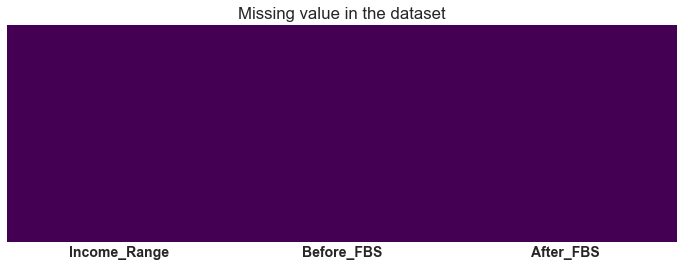

In [5]:
plt.figure(figsize=(12,4))
sns.heatmap(df.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing value in the dataset');

There is no missing value in the data sex

### Plots

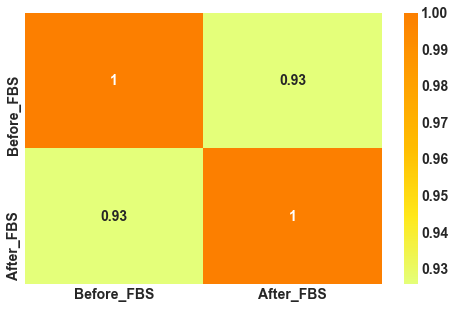

In [6]:
# correlation plot
corr = df.corr()
sns.heatmap(corr, cmap = 'Wistia', annot= True);

Thier no correlation among valiables.

/opt/anaconda3/envs/tensors/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/envs/tensors/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


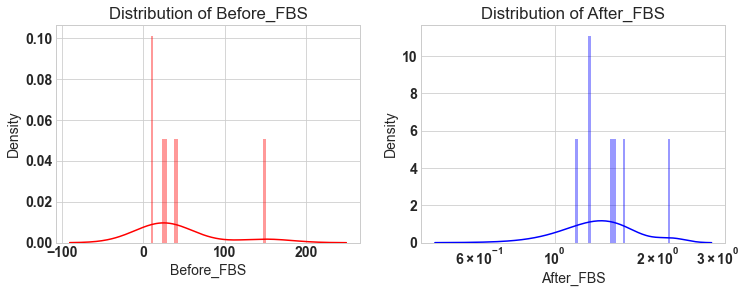

In [11]:
f= plt.figure(figsize=(12,4))

ax=f.add_subplot(121)
sns.distplot(df["Before_FBS"],bins=50,color='r',ax=ax)
ax.set_title('Distribution of Before_FBS')

ax=f.add_subplot(122)
sns.distplot(np.log10(df['After_FBS']),bins=40,color='b',ax=ax)
ax.set_title('Distribution of After_FBS')
ax.set_xscale('log');

If we look at the left plot the charges varies from 1120 to 63500, the plot is right skewed. In right plot we will apply natural log, then plot approximately tends to normal. for further analysis we will apply log on target variable charges. 

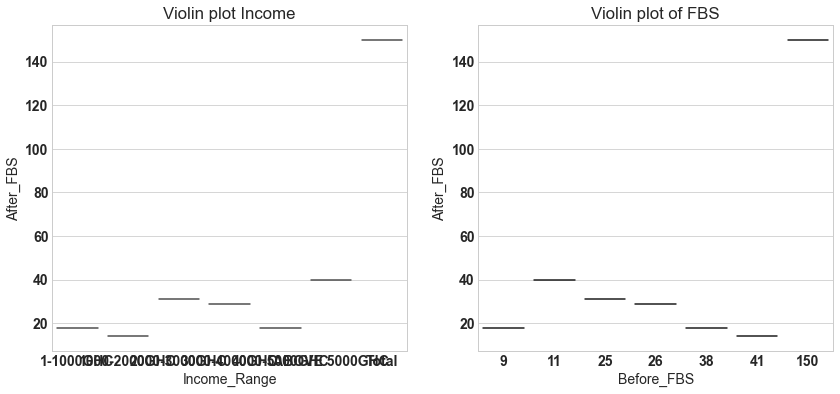

In [12]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.violinplot(x='Income_Range', y='After_FBS',data=df,palette='Wistia',ax=ax)
ax.set_title('Violin plot Income')

ax = f.add_subplot(122)
sns.violinplot(x="Before_FBS", y='After_FBS',data=df,palette='magma',ax=ax)
ax.set_title('Violin plot of FBS');

From left plot the insurance charge for male and female is approximatley in same range,it is average around 5000 bucks. In right plot the insurance charge for smokers is much wide range compare to non smokers, the average charges for non smoker is approximately 5000 bucks. For smoker the minimum insurance charge is itself 5000 bucks.

In [13]:
df.groupby('Income_Range').agg(['mean','min','max'])['After_FBS']

,mean,min,max
Income_Range,,,
1-1000GHC,18.0,18,18
1000-2000GHC,14.0,14,14
2000-3000GHC,31.0,31,31
3000-4000GHC,29.0,29,29
4000-5000GHC,18.0,18,18
ABOVE 5000GHC,40.0,40,40
Total,150.0,150,150


>From left plot the minimum age person is insured is 18 year. There is slabs in policy most of non smoker take $1^{st}$ and $2^{nd}$ slab, for smoker policy start at $2^{nd}$ and $3^{rd}$ slab.

>Body mass index (BMI) is a measure of body fat based on height and weight that applies to adult men and women. The minimum bmi is 16$kg/m^2$ and maximum upto 54$kg/m^2$

## Data Preprocessing
### Encoding
Machine learning algorithms cannot work with categorical data directly, categorical data must be converted to number.
 1. Label Encoding
 2. One hot encoding
 3. Dummy variable trap

**Label encoding** refers to transforming the word labels into numerical form so that the algorithms can understand how to operate on them.

A **One hot encoding** is a representation of categorical variable as binary vectors.It allows the representation of categorical data to be more expresive. This first requires that the categorical values be mapped to integer values, that is label encoding. Then, each integer value is represented as a binary vector that is all zero values except the index of the integer, which is marked with a 1.

The **Dummy variable trap** is a scenario in which the independent variable are multicollinear, a scenario in which two or more variables are highly correlated in simple term one variable can be predicted from the others.

By using *pandas get_dummies* function we can do all above three step in line of code. We will this fuction  to get dummy variable for sex, children,smoker,region features. By setting *drop_first =True* function will remove dummy variable trap by droping one variable and original variable.The pandas makes our life easy.

### Box -Cox transformation
A Box Cox transformation is a way to transform non-normal dependent variables into a normal shape. Normality is an important assumption for many statistical techniques; if your data isn’t normal, applying a Box-Cox means that you are able to run a broader number of tests. All that we need to perform this transformation is to find lambda value and apply the rule shown below to your variable.  
$$\mathbf{ \begin {cases}\frac {y^\lambda - 1}{\lambda},& y_i\neg=0 \\
 log(y_i) & \lambda = 0 \end{cases}}$$
 The trick of Box-Cox transformation is to find lambda value, however in practice this is quite affordable. The following function returns the transformed variable, lambda value,confidence interval

The original categorical variable are remove and also one of the one hot encode varible column for perticular categorical variable is droped from the column. So we completed all three encoding step by using get dummies function.

## Train Test split

In [ ]:
from sklearn.model_selection import train_test_split
X = df_encode.drop('charges',axis=1) # Independet variable
y = df_encode['charges'] # dependent variable

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=23)

## Model building
In this step build model using our linear regression equation $\mathbf{\theta = (X^T X)^{-1} X^Ty}$. In first step we need to add a feature $\mathbf{x_0 =1}$ to our original data set. 

In [ ]:
# Step 1: add x0 =1 to dataset
X_train_0 = np.c_[np.ones((X_train.shape[0],1)),X_train]
X_test_0 = np.c_[np.ones((X_test.shape[0],1)),X_test]

# Step2: build model
theta = np.matmul(np.linalg.inv( np.matmul(X_train_0.T,X_train_0) ), np.matmul(X_train_0.T,y_train)) 

In [ ]:
# The parameters for linear regression model
parameter = ['theta_'+str(i) for i in range(X_train_0.shape[1])]
columns = ['intersect:x_0=1'] + list(X.columns.values)
parameter_df = pd.DataFrame({'Parameter':parameter,'Columns':columns,'theta':theta})

In [ ]:
# Scikit Learn module
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train) # Note: x_0 =1 is no need to add, sklearn will take care of it.

#Parameter
sk_theta = [lin_reg.intercept_]+list(lin_reg.coef_)
parameter_df = parameter_df.join(pd.Series(sk_theta, name='Sklearn_theta'))
parameter_df

The parameter obtained from both the model are same.So we succefull build our model using normal equation and verified using sklearn linear regression module. Let's move ahead, next step is prediction and model evaluvation.

## Model evaluation
We will predict value for target variable by using our model parameter for test data set. Then compare the predicted value with actual valu in test set. We compute **Mean Square Error** using formula 
$$\mathbf{ J(\theta) = \frac{1}{m} \sum_{i=1}^{m}(\hat{y}_i - y_i)^2}$$

$\mathbf{R^2}$ is statistical measure of how close data are to the fitted regression line. $\mathbf{R^2}$ is always between 0 to 100%. 0% indicated that model explains none of the variability of the response data around it's mean. 100% indicated that model explains all the variablity of the response data around the mean.

$$\mathbf{R^2 = 1 - \frac{SSE}{SST}}$$
**SSE = Sum of Square Error**  
**SST = Sum of Square Total**  
$$\mathbf{SSE = \sum_{i=1}^{m}(\hat{y}_i - y_i)^2}$$
$$\mathbf{SST = \sum_{i=1}^{m}(y_i - \bar{y}_i)^2}$$
Here $\mathbf{\hat{y}}$ is predicted value and $\mathbf{\bar{y}}$ is mean value of $\mathbf{y}$.

In [ ]:
# Normal equation
y_pred_norm =  np.matmul(X_test_0,theta)

#Evaluvation: MSE
J_mse = np.sum((y_pred_norm - y_test)**2)/ X_test_0.shape[0]

# R_square 
sse = np.sum((y_pred_norm - y_test)**2)
sst = np.sum((y_test - y_test.mean())**2)
R_square = 1 - (sse/sst)
print('The Mean Square Error(MSE) or J(theta) is: ',J_mse)
print('R square obtain for normal equation method is :',R_square)

In [ ]:
# sklearn regression module
y_pred_sk = lin_reg.predict(X_test)

#Evaluvation: MSE
from sklearn.metrics import mean_squared_error
J_mse_sk = mean_squared_error(y_pred_sk, y_test)

# R_square
R_square_sk = lin_reg.score(X_test,y_test)
print('The Mean Square Error(MSE) or J(theta) is: ',J_mse_sk)
print('R square obtain for scikit learn library is :',R_square_sk)

The model returns $R^2$ value of 77.95%, so it fit our data test very well, but still we can imporve the the performance of by diffirent technique. Please make a note that we have transformer out variable by applying  natural log. When we put model into production antilog is applied to the equation.

## Model Validation
In order to validated model we need to check few assumption of linear regression model. The common assumption for *Linear Regression* model are following
1. Linear Relationship: In linear regression the relationship between the dependent and independent variable to be *linear*. This can be checked by scatter ploting Actual value Vs Predicted value
2. The residual error plot should be *normally* distributed.
3. The *mean* of *residual error* should be 0 or close to 0 as much as possible
4. The linear regression require all variables to be multivariate normal. This assumption can best checked with Q-Q plot.
5. Linear regession assumes that there is little or no *Multicollinearity in the data. Multicollinearity occurs when the independent variables are too highly correlated with each other. The variance inflation factor *VIF* identifies correlation between independent variables and strength of that correlation. $\mathbf{VIF = \frac {1}{1-R^2}}$, If VIF >1 & VIF <5 moderate correlation, VIF < 5 critical level of multicollinearity.
6. Homoscedasticity: The data are homoscedastic meaning the residuals are equal across the regression line. We can look at residual Vs fitted value scatter plot. If heteroscedastic plot would exhibit a funnel shape pattern.

In [ ]:
# Check for Linearity
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(y_test,y_pred_sk,ax=ax,color='r')
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')

# Check for Residual normality & mean
ax = f.add_subplot(122)
sns.distplot((y_test - y_pred_sk),ax=ax,color='b')
ax.axvline((y_test - y_pred_sk).mean(),color='k',linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual eror');

In [ ]:
# Check for Multivariate Normality
# Quantile-Quantile plot 
f,ax = plt.subplots(1,2,figsize=(14,6))
import scipy as sp
_,(_,_,r)= sp.stats.probplot((y_test - y_pred_sk),fit=True,plot=ax[0])
ax[0].set_title('Check for Multivariate Normality: \nQ-Q Plot')

#Check for Homoscedasticity
sns.scatterplot(y = (y_test - y_pred_sk), x= y_pred_sk, ax = ax[1],color='r') 
ax[1].set_title('Check for Homoscedasticity: \nResidual Vs Predicted');

In [ ]:
# Check for Multicollinearity
#Variance Inflation Factor
VIF = 1/(1- R_square_sk)
VIF

The model assumption linear regression as follows
1. In our model  the actual vs predicted plot is curve so linear assumption fails
2. The residual mean is zero and residual error plot right skewed
3. Q-Q plot shows as value log value greater than 1.5 trends to increase
4. The plot is exhibit heteroscedastic, error will insease after certian point.
5. Variance inflation factor value is less than 5, so no multicollearity.